# Unsupervised methods

### Preprocess the dataset for clustering algorithms.

Using only selected features
Transform the features to follow a normal distribution

In [264]:
import pandas as pd

df = pd.read_csv('temp/Delivery_truck_trip_data_df.csv')

In [265]:
columns1 = ['OriginLocation_Code', 'vehicle_no', 'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'supplierID', 'trip_time', 'day', 'month', 'year']

In [266]:
df.reset_index(drop=True, inplace=True)
X = df.drop(['ontime'], axis=1)
y = df['ontime']

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
columns = ['Market/Regular', 'vehicle_no', 'OriginLocation_Code', 'DestinationLocation_Code', 'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'customerID', 'supplierID', 'Material Shipped', 'dayofweek']
X[columns] = encoder.fit_transform(X[columns])

X = X[columns1]

from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
X = qt.fit_transform(X)

### Create a Table of performance

In [267]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

table_of_performance = pd.DataFrame(columns=['algorithm', 'confusion matrix', 'accuracy', 'precision', 'recall', 'rand index', 'mutual information based score', 'homogeneity', 'completeness', 'v-measure'])

def add_performance(algorithm, y, y_predict):
    global table_of_performance

    cm = confusion_matrix(y, y_predict)
    accuracy = accuracy_score(y, y_predict)
    precision = precision_score(y, y_predict)
    recall = recall_score(y, y_predict)
    rand_index = rand_score(y, y_predict)
    mutual_info_score = adjusted_mutual_info_score(y, y_predict)
    homogeneity = homogeneity_score(y, y_predict)
    completeness = completeness_score(y, y_predict)
    v_measure = v_measure_score(y, y_predict)
    
    new_row = {'algorithm': algorithm, 'confusion matrix': cm, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'rand index': rand_index, 'mutual information based score': mutual_info_score, 'homogeneity': homogeneity, 'completeness': completeness, 'v-measure': v_measure}

    table_of_performance.loc[len(table_of_performance)] = new_row

### Visualization of clustering after PCA

<Axes: xlabel='x', ylabel='y'>

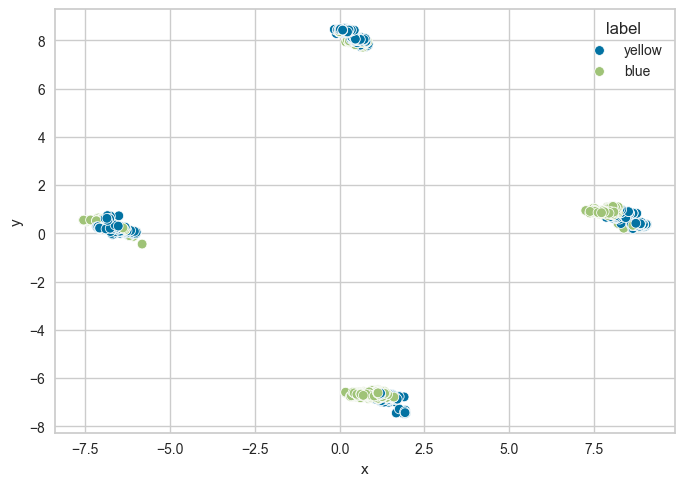

In [268]:
from sklearn.decomposition import  PCA
import numpy as np

pca = PCA(n_components=2)
pct = pca.fit_transform(X)

pct = np.delete(pct, 6745, 0)
y_new = np.delete(y.to_numpy(), 6745, 0)

y_new = ['yellow' if elem else 'blue' for elem in y_new]

data = pd.concat([pd.DataFrame(pct), pd.DataFrame(y_new)], axis=1)

data.columns = ['x', 'y', 'label']
import seaborn as sns

sns.scatterplot(data=data, x="x", y="y", hue="label")

### KMeans

/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

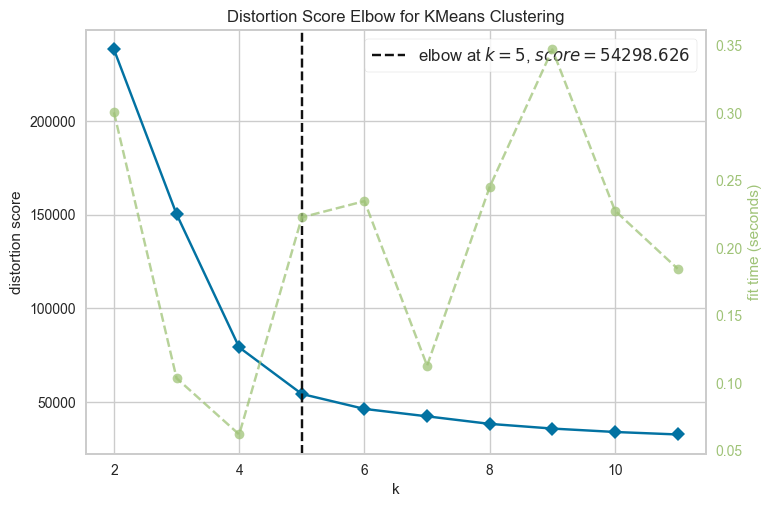

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [269]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

The optimal number of clusters is 5.

In [270]:
k_means = KMeans(init="k-means++", n_clusters=2, n_init=10, random_state=103)
k_means.fit(X)

from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

from sklearn.metrics.pairwise import pairwise_distances_argmin_min

k_means_distances_df = pd.DataFrame(pairwise_distances_argmin_min(X, k_means_cluster_centers)).T
k_means_distances_df.columns = ['cluster', 'distance']
y_predict = k_means_distances_df['cluster'].map({0: False, 1: True})
add_performance('KMeans', y, y_predict)

{'algorithm': 'KMeans', 'confusion matrix': array([[1482, 1038],
       [2021, 2209]]), 'accuracy': 0.5468148148148149, 'precision': 0.68032029565753, 'recall': 0.5222222222222223, 'rand index': 0.5043098181898004, 'mutual information based score': 0.008353008495087574, 'homogeneity': 0.008664735356212799, 'completeness': 0.008267781692862743, 'v-measure': 0.008461605577477674}


In [271]:
table_of_performance

,algorithm,confusion matrix,accuracy,precision,recall,rand index,mutual information based score,homogeneity,completeness,v-measure
0,KMeans,"[[1482, 1038], [2021, 2209]]",0.546815,0.68032,0.522222,0.50431,0.008353,0.008665,0.008268,0.008462


### Affinity Propagation

In [272]:
'''
from scipy.spatial.distance import pdist

max(pdist(X))
'''

'\nfrom scipy.spatial.distance import pdist\n\nmax(pdist(X))\n'

In [273]:
'''
from sklearn.cluster import AffinityPropagation

pca = PCA(n_components=3)
pct = pca.fit_transform(X)
af = AffinityPropagation(random_state=0).fit(pct)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
len(cluster_centers_indices)
'''

'\nfrom sklearn.cluster import AffinityPropagation\n\npca = PCA(n_components=3)\npct = pca.fit_transform(X)\naf = AffinityPropagation(random_state=0).fit(pct)\ncluster_centers_indices = af.cluster_centers_indices_\nlabels = af.labels_\nlen(cluster_centers_indices)\n'

Can't specify the number of clusters

### Mean Shift

In [274]:
'''
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.3)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
'''

'\nfrom sklearn.cluster import MeanShift, estimate_bandwidth\n\nbandwidth = estimate_bandwidth(X, quantile=0.3)\n\nms = MeanShift(bandwidth=bandwidth, bin_seeding=True)\nms.fit(X)\nlabels = ms.labels_\ncluster_centers = ms.cluster_centers_\n'

In [275]:
'''
mean_shift_distances_df = pd.DataFrame(pairwise_distances_argmin_min(X, cluster_centers)).T
mean_shift_distances_df.columns = ['cluster', 'distance']
mean_shift_distances_df = pd.concat([mean_shift_distances_df, y], axis=1)
print(mean_shift_distances_df.groupby(['cluster', 'ontime']).mean())
print(mean_shift_distances_df.groupby(['cluster', 'ontime']).count())
'''

"\nmean_shift_distances_df = pd.DataFrame(pairwise_distances_argmin_min(X, cluster_centers)).T\nmean_shift_distances_df.columns = ['cluster', 'distance']\nmean_shift_distances_df = pd.concat([mean_shift_distances_df, y], axis=1)\nprint(mean_shift_distances_df.groupby(['cluster', 'ontime']).mean())\nprint(mean_shift_distances_df.groupby(['cluster', 'ontime']).count())\n"

In cluster 1 and 3, most are on time. In cluster 2, most are not on time. In clusters 0, almost half of the points are anomalies.

### Spectral clustering

In [276]:
from sklearn.cluster import SpectralClustering
import joblib

# spectral_clustering = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0).fit(X)
# joblib.dump(spectral_clustering, 'spectral_clustering_model.pkl')
loaded_model = joblib.load('temp/spectral_clustering_model.pkl')

In [277]:
'''
print(pd.DataFrame(loaded_model.labels_).value_counts())
spectral_clustering_labels_df = pd.DataFrame(spectral_clustering.labels_, columns=['cluster'])
spectral_clustering_labels_df = pd.concat([spectral_clustering_labels_df, y], axis=1)
print(spectral_clustering_labels_df['cluster'].value_counts())
print(spectral_clustering_labels_df.value_counts())
print(spectral_df.value_counts())
'''

"\nprint(pd.DataFrame(loaded_model.labels_).value_counts())\nspectral_clustering_labels_df = pd.DataFrame(spectral_clustering.labels_, columns=['cluster'])\nspectral_clustering_labels_df = pd.concat([spectral_clustering_labels_df, y], axis=1)\nprint(spectral_clustering_labels_df['cluster'].value_counts())\nprint(spectral_clustering_labels_df.value_counts())\nprint(spectral_df.value_counts())\n"

In cluster 2, almost half are anomalies. In cluster 0 and 3, most are not anomalies. In cluster 1 most are anomalies.

### Hierarchical clustering

In [278]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_clustering = AgglomerativeClustering(n_clusters=2).fit(X)

In [279]:
hierarchical_clustering_labels_df = pd.DataFrame(hierarchical_clustering.labels_, columns=['cluster'])
hierarchical_clustering_labels_df = pd.concat([hierarchical_clustering_labels_df, y], axis=1)
print(pd.DataFrame(hierarchical_clustering_labels_df.value_counts()))

y_predict = hierarchical_clustering_labels_df['cluster'].map({0: False, 1: True})
add_performance('hierarchical clustering', y, y_predict)

                count
cluster ontime       
1       True     2358
0       False    2119
        True     1872
1       False     401
{'algorithm': 'hierarchical clustering', 'confusion matrix': array([[2119,  401],
       [1872, 2358]]), 'accuracy': 0.6632592592592592, 'precision': 0.8546574845958681, 'recall': 0.5574468085106383, 'rand index': 0.5532409849470155, 'mutual information based score': 0.12340587534185737, 'homogeneity': 0.12496955239048377, 'completeness': 0.12207051751557847, 'v-measure': 0.12350302475057871}


### HDBSCAN

In [280]:
from sklearn.cluster import HDBSCAN

hdb = HDBSCAN(min_cluster_size=20)
hdb.fit(X)

HDBSCAN(min_cluster_size=20)

In [281]:
hdbscan_labels_df = pd.DataFrame(hdb.labels_, columns=['clusters'])
hdbscan_labels_df = pd.concat([hdbscan_labels_df, y], axis=1)
hdbscan_labels_df[hdbscan_labels_df.clusters==-1].value_counts()

clusters  ontime
-1        False     473
          True      439
Name: count, dtype: int64

In [282]:
y_predict = hdbscan_labels_df['clusters'].map(lambda x: x >= 0)
add_performance('HDBSCAN', y, y_predict)

{'algorithm': 'HDBSCAN', 'confusion matrix': array([[ 473, 2047],
       [ 439, 3791]]), 'accuracy': 0.6317037037037037, 'precision': 0.6493662213086674, 'recall': 0.8962174940898345, 'rand index': 0.5346227863661558, 'mutual information based score': 0.012807533442977132, 'homogeneity': 0.01035255530027518, 'completeness': 0.017273215897873482, 'v-measure': 0.012946022140971857}


HDBSCAN doesn't work well.

### OPTICS

In [283]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=2).fit(X)

/Users/boweigao/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [284]:
optics_labels_df = pd.DataFrame(optics.labels_, columns=['clusters'])
optics_labels_df = pd.concat([optics_labels_df, y], axis=1)
optics_labels_df.value_counts()

clusters  ontime
-1        True      826
          False     516
 617      True       11
 695      True        9
 833      True        9
                   ... 
 1753     False       1
 365      True        1
 508      False       1
 1598     False       1
 398      False       1
Name: count, Length: 2184, dtype: int64

In [285]:
y_predict = optics_labels_df['clusters'].map(lambda x: x >= 0)
add_performance('OPTICS', y, y_predict)

{'algorithm': 'OPTICS', 'confusion matrix': array([[ 516, 2004],
       [ 826, 3404]]), 'accuracy': 0.5807407407407408, 'precision': 0.6294378698224852, 'recall': 0.8047281323877069, 'rand index': 0.5129659812427629, 'mutual information based score': -1.407928565795265e-05, 'homogeneity': 9.980925209412289e-05, 'completeness': 0.00013221835053302345, 'v-measure': 0.00011375038599201294}


### BIRCH

In [286]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=2)
brc.fit(X)
brc.predict(X)

array([1, 1, 1, ..., 0, 0, 0])

In [287]:
brc_labels_df = pd.DataFrame(brc.labels_, columns=['cluster'])
brc_labels_df = pd.concat([brc_labels_df, y], axis=1)
print(brc_labels_df.value_counts())

y_predict = brc_labels_df['cluster'].map({1: False, 0: True})
add_performance('BIRCH', y, y_predict)

cluster  ontime
0        True      2209
1        True      2021
         False     1482
0        False     1038
Name: count, dtype: int64
{'algorithm': 'BIRCH', 'confusion matrix': array([[1482, 1038],
       [2021, 2209]]), 'accuracy': 0.5468148148148149, 'precision': 0.68032029565753, 'recall': 0.5222222222222223, 'rand index': 0.5043098181898004, 'mutual information based score': 0.008353008495087574, 'homogeneity': 0.008664735356212799, 'completeness': 0.008267781692862743, 'v-measure': 0.008461605577477674}


In [289]:
table_of_performance

,algorithm,confusion matrix,accuracy,precision,recall,rand index,mutual information based score,homogeneity,completeness,v-measure
0,KMeans,"[[1482, 1038], [2021, 2209]]",0.546815,0.680320,0.522222,0.504310,0.008353,0.008665,0.008268,0.008462
1,hierarchical clustering,"[[2119, 401], [1872, 2358]]",0.663259,0.854657,0.557447,0.553241,0.123406,0.124970,0.122071,0.123503
2,HDBSCAN,"[[473, 2047], [439, 3791]]",0.631704,0.649366,0.896217,0.534623,0.012808,0.010353,0.017273,0.012946
3,OPTICS,"[[516, 2004], [826, 3404]]",0.580741,0.629438,0.804728,0.512966,-0.000014,0.000100,0.000132,0.000114
4,BIRCH,"[[1482, 1038], [2021, 2209]]",0.546815,0.680320,0.522222,0.504310,0.008353,0.008665,0.008268,0.008462
